## Dataset avvistamenti UFO

**Attenzione**: Nelle date (campo 'datetime') è presente anche come ora 24:xx che però causa problemi con 
        tutto quello che parsa le date. Ho fatto 'sostituisci tutto' 24 -> 00 ma non è proprio corretto
        perchè bisogna anche aumentare il giorno  
**Attenzione**: Il file 'sample.csv' è il dataset 'scrubbed.csv' ma con solo 1 riga ogni 10, è meglio per testare visto che il dataset originale sono circa 80000 righe e ci mette molto per calcolare alcune cose

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
DATASET = 'ufos.csv'
data = pd.read_csv(DATASET)

In [12]:
# Questo è leeeento
data['datetime'] = pd.to_datetime(data['datetime'])

In [13]:
counts = data['datetime'].dt.hour.value_counts()

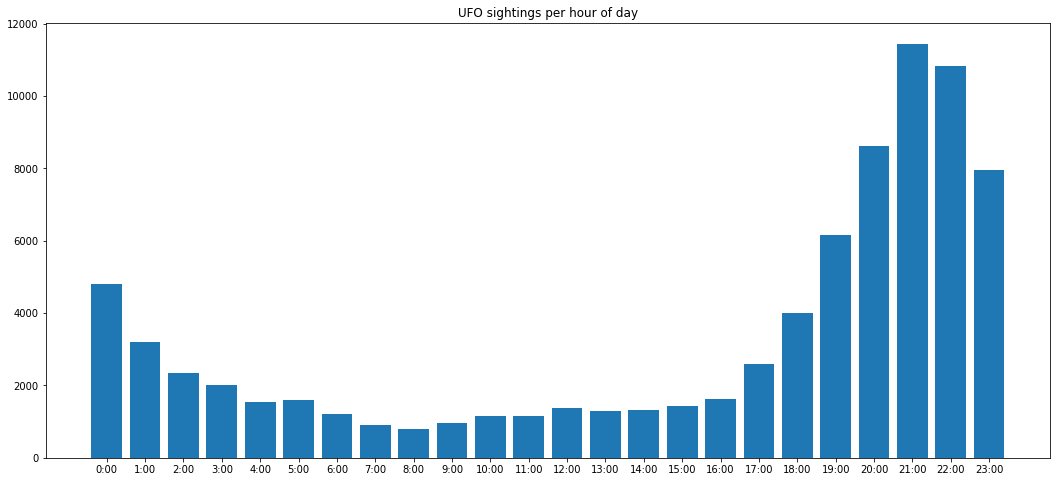

In [14]:
# Grafico degli avvistamenti per ora del giorno (senza colori)

plt.figure(figsize=(18, 8))
plt.title('UFO sightings per hour of day')
bars = plt.bar(counts.index, counts.get_values())
labels = [f'{h}:00' for h in range(0, 24)]
plt.xticks(range(len(labels)), labels)

plt.show()

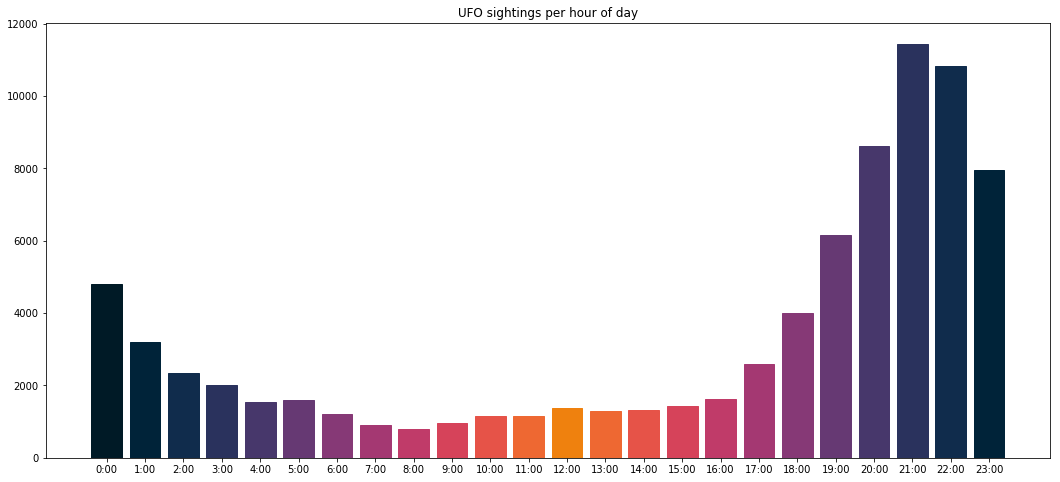

In [18]:
# Grafico degli avvistamenti per ora del giorno (con colori)
gradients = [
    (0, 26, 38), (0, 35, 57), (16, 44, 76), (42, 50, 93), 
    (71, 55, 107), (102, 57, 115), (134, 57, 118), (164, 56, 114), 
    (192, 59, 105), (214, 67, 90), (230, 83, 72), (238, 104, 50), 
    (239, 129, 14)
]
gradients = [(r/255, g/255, b/255, 1.0) for (r, g, b) in gradients]
gradients = gradients + list(reversed(gradients[:-1]))

# dalle 0:00 alle 23:00
g2 = [
    (0, 26, 38), (0, 26, 38), (7, 29, 37), (32, 40, 35), 
    (82, 61, 30), (109, 73, 27), (146, 89, 23), (159, 95, 22), 
    (171, 100, 21), (184, 105, 20), (196, 110, 18), (209, 116, 17), 
    (237, 128, 14), (209, 116, 17), (196, 110, 18), (184, 105, 20), 
    (171, 100, 21), (159, 95, 22), (146, 89, 23), (109, 73, 27), 
    (82, 61, 30), (32, 40, 35), (7, 29, 37), (0, 26, 38)
]
g2 = [(r/255, g/255, b/255, 1.0) for (r, g, b) in g2]

plt.figure(figsize=(18, 8))
plt.title('UFO sightings per hour of day')
bars = plt.bar(counts.index, counts.get_values())
labels = [f'{h}:00' for h in range(0, 24)]
plt.xticks(range(len(labels)), labels)

for bar_i, index in enumerate(counts.index):
    bars[bar_i].set_color(gradients[index])
plt.show()

C:\Users\marco\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


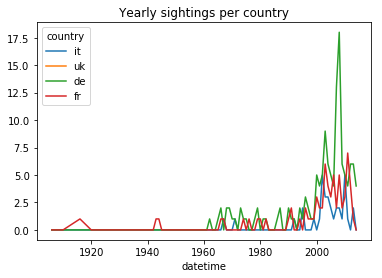

<Figure size 1296x576 with 0 Axes>

In [42]:
ct_countryyear = pd.crosstab(data['datetime'].dt.year, data['country'])
ct_countryyear = ct_countryyear.loc[:, ['it', 'uk', 'de', 'fr']]
ct_countryyear.plot()

plt.title('Yearly sightings per country')
plt.figure(figsize=(18, 8))
plt.show()